# EDA and Data Visualisation: House Prices

## Introduction

The data for this notebook comes from Kaggle's [House Prices - Advanced Regression Techniques competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The purpose of this notebook is simply to demonstrate some routine data cleaning, exploration, and visualisation.

## Importing relevant libraries and modules

There are four libraries/modules that we will import for this notebook:
1. pandas
2. NumPy
3. Seaborn
4. OS

In this instance, OS is imported simply to change our working directory, allowing us to import the CSV file that contains our dataset. This is our first port of call, followed by using the read_csv function from the pandas library to read our CSV file to a dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

os.chdir('C:/Users/rocou/Documents/Data Science/Programming/Datasets/')
df = pd.read_csv('house_prices_adv_reg_train.csv')

## Basic data description and pre-processing

Here we take a look at the basic structure and content of the dataset. First, we look at the shape of the data:

In [2]:
print(df.shape)

(1460, 81)


This tells us that the data consists of 1460 rows/observations, across 81 different columns/variables. This number of columns may be cumbersome to work with, so it is worth looking at the columns and determining whether any are redundant for our purposes.

In [3]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

A look at the columns reveals that many of them are incredibly specific (3SsnPorch represents the square footage of three-season porch, GarageFinish represents the interior finish of the garage) and others are subjective (garage quality, kitchen quality, etc.). As such, we first define a list of all the variables that we no longer want in our data set, and then use the drop function to remove them:

In [4]:
var_drop = ['Alley', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig',
            'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
            'RoofMatl', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC', 'Electrical',
            'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'BsmtFullBath',
            'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType',
            'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
            'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
            '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature',
            'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'OverallQual',
           'OverallCond', 'ExterQual', 'ExterCond', 'KitchenQual']
df = df.drop(var_drop, axis=1)
print(df.shape)
print(df.columns)

(1460, 28)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Utilities',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Foundation', 'TotalBsmtSF', 'Heating', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea',
       'YrSold', 'SalePrice'],
      dtype='object')


We now have a more concise dataframe consisting of 28 columns. Next, we perform a quick check of the dataset for any missing values, using the isnull function:

In [5]:
print(df.isnull().sum())

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
Street          0
Utilities       0
BldgType        0
HouseStyle      0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     0
Foundation      0
TotalBsmtSF     0
Heating         0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
Fireplaces      0
GarageCars      0
GarageArea      0
PoolArea        0
YrSold          0
SalePrice       0
dtype: int64


This indicates that there are no missing values across the entire dataset; this makes our job easier as missing values generally present a number of different options regarding how best to deal with them. For instance, if you find that a significant portion of observations for a given variable contain missing values, it may seem wise to drop this variable - indeed, this may sometimes be the most appropriate response.
</br>
</br>
However, take for instance our variable PoolArea, our variable that represents the area of pool in square feet. A quick look at the distribution of this variable shows that only 7 of our observations contain non-zero values, meaning ~99.5% of the values for this variable are zero. If the decision had been made to record houses without any pool as NaN rather than as having 0 square feet of pool, then this may well have led us to drop this variable. In reality, if we were interested in building a predictive model for house prices, we would surely like to know that the house has 738 square feet of pool associated with it.

In [6]:
print(sum(df['PoolArea']!=0))
print((sum(df['PoolArea']==0)/len(df))*100)

7
99.52054794520548


Next, we use the *describe* function to produce some basic descriptive statistics with respect to our data.

In [7]:
print(df.describe())

                Id   MSSubClass        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    56.897260   10516.828082  1971.267808   1984.865753   
std     421.610009    42.300571    9981.264932    30.202904     20.645407   
min       1.000000    20.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    20.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    50.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    70.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   190.000000  215245.000000  2010.000000   2010.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF     FullBath     HalfBath  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466     1.565068     0.382877   
std     438.705324   386.587738   436.528436     0.550916     0.502885   
min       

This allows us to quickly garner some insight about the distribution and central tendencies of our variables. For instance, the average house in our dataset was built in 1971, with the earliest built in 1872 and the most recent in 2010. The average house has a lot area of ~10,500 square feet, 2 or 3 bedrooms, a 1 or 2 car garage, sold for roughly \$180,000, and so on. 
</br>
</br>
Next, we take a look at some of our categorical variables - in particular, we want to see how many categories there are in each. With one line of code we are able to filter the dataframe by data type, excluding those columns which contain numerical data, and then retrieve the number of unique values for each:

In [10]:
print(df.select_dtypes(exclude=[np.number]).nunique())  # view number of unique entries for each col

MSZoning        5
Street          2
Utilities       2
BldgType        5
HouseStyle      8
RoofStyle       6
Exterior1st    15
Foundation      6
Heating         6
CentralAir      2
dtype: int64


In terms of the number of categories and the subjective content of these variables, building type and house style stand out as two that may be a useful way of breaking down our data when creating our visualisations.

## Data Visualisation

### Histograms

To begin with, we produce some simple histograms to help us understand the distribution of our key variables:

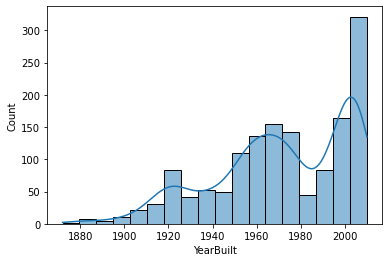

In [19]:
hist1 = sns.histplot(df, x='YearBuilt', kde=True)


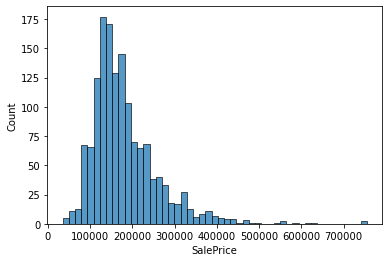

In [21]:
hist2 = sns.histplot(df, x='SalePrice')

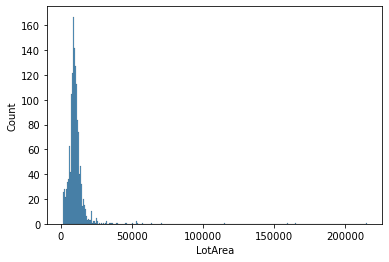

In [22]:
hist3 = sns.histplot(df, x='LotArea')

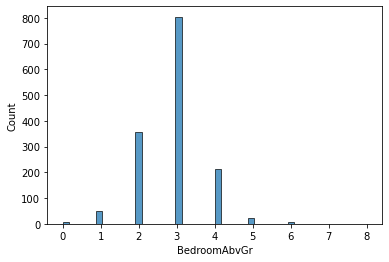

In [23]:
hist4 = sns.histplot(df, x='BedroomAbvGr')

In the case of our first histogram, we find that the distribution of houses is heavily left-skewed, with a significant majority of houses in our dataset being built in the post-war period; this suggests a steady increase in the number of houses built over time, with the exception of some peaks during the 1920s, post-war period, and 2000s housing boom, and a considerable drop in the early 1980's (likely reflecting the Federal Reserve's interest rate hikes, which caused mortgages to top out at nearly 20%).
</br>
</br>
Our remaining histograms confirm what we might already have guessed about the distribution of sale price, lot area, and number of bedrooms. In particular, both sale price and lot area are heavily right-skewed, with a long right tail caused by a small number of far larger, more expensive houses. Our final histograms tells us that the majority of houses contain 2-4 bedrooms, with 3 the most popular choice.
</br>
</br>
Here we can take advantage of our categorical variables to include additional information in our histograms. We will take advantage of stacked bars to show the proportion of different house styles within our existing histograms. However, upon closer inspection of the HouseStyle variable we can see that some categories are redundant, and can instead be combined:

In [30]:
print(df['HouseStyle'].unique())

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In particular, we look to combine the 'finished' and 'unfinished' categories for each story, and we look to combine split foyer and split level into one split value. To do so, we define our conditions, our choices/outputs, and then use the NumPy *select* function to create a new column based on the former:

In [32]:
conditions = [  # define conditions
    (df['HouseStyle'] == '2Story'),
    (df['HouseStyle'] == '1Story'),
    (df['HouseStyle'] == '1.5Fin') | (df['HouseStyle'] == '1.5Unf'),
    (df['HouseStyle'] == 'SFoyer') | (df['HouseStyle'] == 'SLvl'),
    (df['HouseStyle'] == '2.5Unf') | (df['HouseStyle'] == '2.5Fin')
    ]

choices = ['2Story', '1Story', '1.5Story', 'Split', '2.5Story']  # define choices

df['HouseStyle'] = np.select(conditions, choices, default='nan')
print(df['HouseStyle'].unique())

['2Story' '1Story' '1.5Story' 'Split' '2.5Story']


This has yielded the desired result, and we are able to plot new histograms with our additional variable:

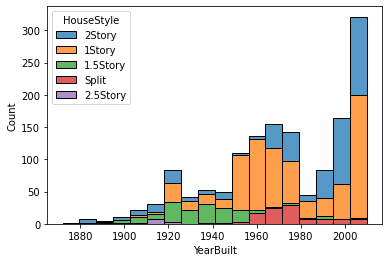

In [34]:
hist5 = sns.histplot(df, x='YearBuilt', hue='HouseStyle', multiple='stack')

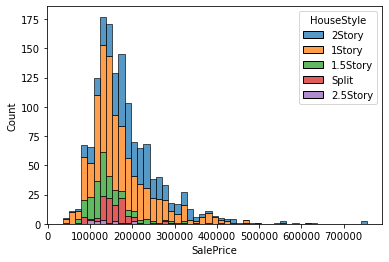

In [35]:
hist6 = sns.histplot(df, x='SalePrice', hue='HouseStyle', multiple='stack')

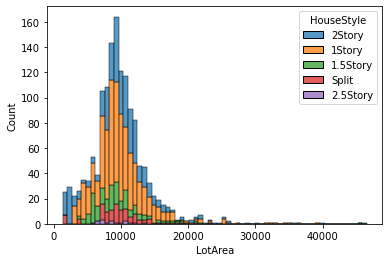

In [42]:
hist7 = sns.histplot(df.loc[df['LotArea']<50000], x='LotArea', hue='HouseStyle', multiple='stack')

From this, it's clear that 1 and 2 story houses make up the majority of our data, as could be expected. Conversely, 1.5/2.5 story and split houses are less frequent by comparison. As they relate to price however, the results are less intuitive: it might be expected that 2 story houses would make up a higher proportion of our dataset as we move up to higher value houses, but this relationship is not borne out by the above plots.

### Dot plot and pair grid

A look at the below figures, in particular the second of the two, is more instructive. By grouping the dataframe by house style and taking taking the mean sale price, we see that 2 and 2.5 story houses constitute the highest average sale prices in our dataset.

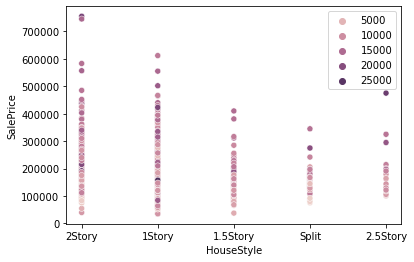

In [54]:
dotplot1 = sns.scatterplot(data=df.loc[df['LotArea']<30000], x="HouseStyle", y="SalePrice", hue='LotArea')
dotplot1.legend(loc='upper right')

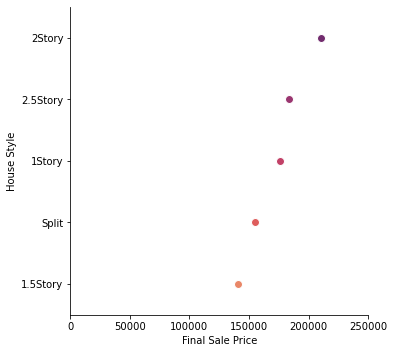

In [63]:
df_dp = df[['HouseStyle', 'SalePrice']].groupby(['HouseStyle']).mean()
df_dp = df_dp.reset_index()

pairg1 = sns.PairGrid(df_dp.sort_values("SalePrice", ascending=False), x_vars=df_dp.columns[1:], 
                      y_vars=['HouseStyle'], height=5, aspect=1)

pairg1.map(sns.stripplot, size=8, orient='h', jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

pairg1.set(xlim=(0,250000), xlabel='Final Sale Price', ylabel='House Style')